# Research Project

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# PCA
here we load the dataset, by grabbing the images and converting a 64x64x3 image and flattening it to fit in a row with 

In [3]:


# Function to load and preprocess the dataset


def load_dataset(path):
    images = []
    labels = []
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image = Image.open(os.path.join(
                    class_path, image_file)).convert('RGB')
                image = image.resize((64, 64))  # Resize images for consistency
                # Flatten the image into a 1D array
                image = np.array(image).flatten()
                images.append(image)
                labels.append(class_dir)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Each row is a flattened image and the columns represent the pixels in 3 channels 64*64*3
# Load the dataset
images, labels = load_dataset(
    '/Users/henriquerio/Documents/IIT/FALL2024/csp571_Project/data')


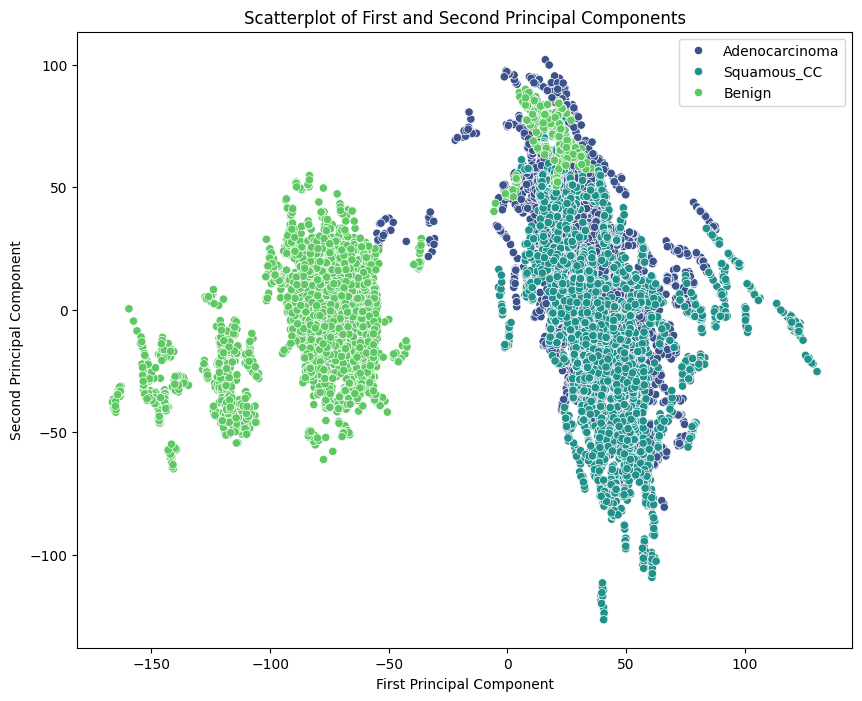

In [4]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)


# Step 2: First PCA
n_components = 50
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_scaled)


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=images_pca[:, 0],
    y=images_pca[:, 1],
    hue=labels,
    palette='viridis',
    legend='full'
)

plt.title('Scatterplot of First and Second Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [5]:
print(images_pca.shape)


(15000, 50)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7611454828455774..0.3160099844181544].


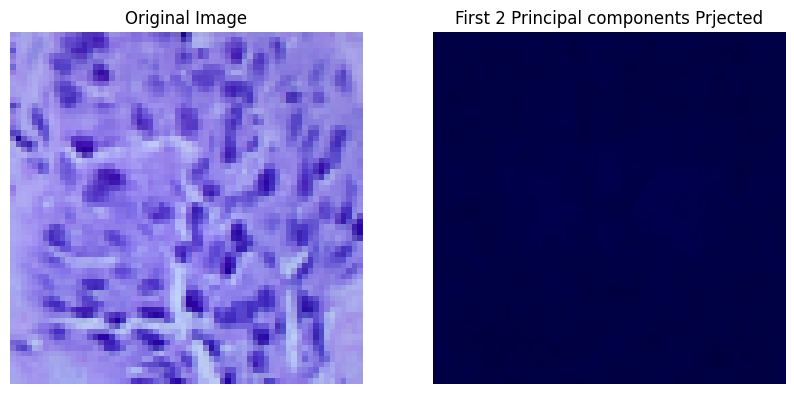

In [17]:

index= 10000
image_flat = images_scaled[index]  

pca = PCA(n_components=2)
pca.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca = pca.transform(image_flat.reshape(1, -1))

image_reconstructed = pca.inverse_transform(image_pca)

image_reconstructed_reshaped = image_reconstructed.reshape(64, 64, 3)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed_reshaped)
plt.title("First 2 Principal components Prjected")
plt.axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4468306400201736..1.5785714316635329].


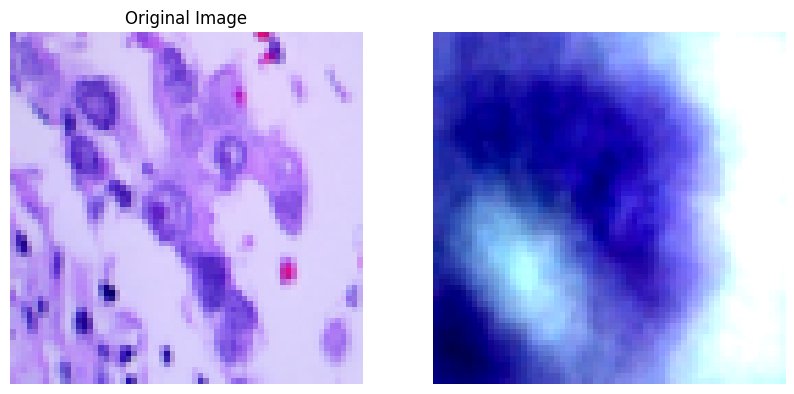

In [18]:

index = 10
image_flat = images_scaled[index]

pca = PCA(n_components=20)
pca.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca = pca.transform(image_flat.reshape(1, -1))

image_reconstructed = pca.inverse_transform(image_pca)

image_reconstructed_reshaped = image_reconstructed.reshape(64, 64, 3)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed_reshaped)
plt.axis('off')

plt.show()


# PCA in Grayscale

In [ ]:
# Function to load and preprocess the dataset


def load_dataset_gray(path):
    images = []
    labels = []
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image = Image.open(os.path.join(
                    class_path, image_file)).convert('L')
                image = image.resize((64, 64))  # Resize images for consistency
                # Flatten the image into a 1D array
                image = np.array(image).flatten()
                images.append(image)
                labels.append(class_dir)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Each row is a flattened image and the columns represent the pixels in 1 channel 64*64*
# Load the dataset
images_gray, labels = load_dataset_gray(
    '/Users/henriquerio/Documents/IIT/FALL2024/csp571_Project/data')




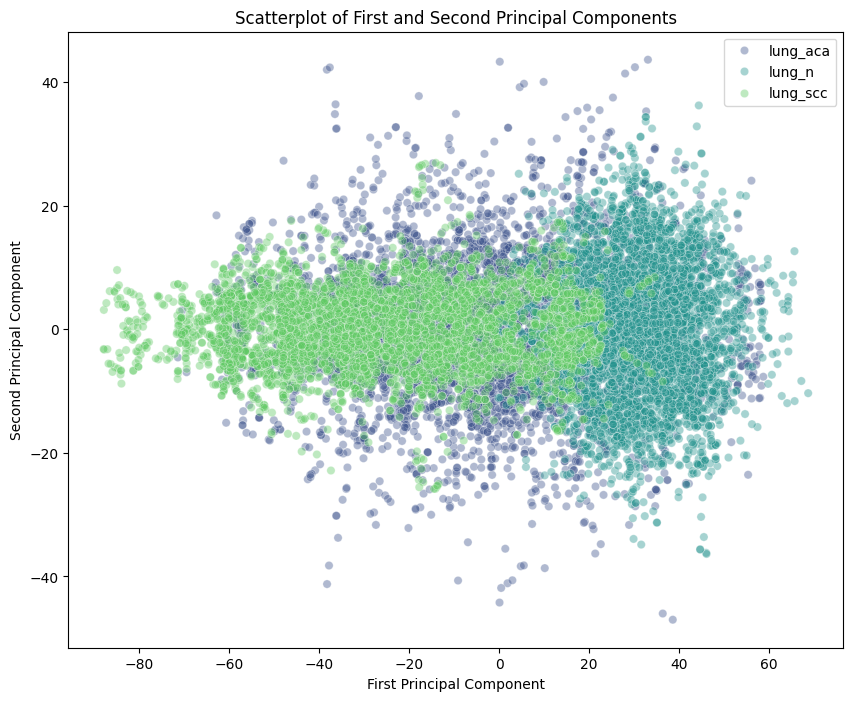

In [32]:
scaler = StandardScaler()
images_scaled_gray = scaler.fit_transform(images_gray)


n_components = 50
pca = PCA(n_components=n_components)
images_pca_gray = pca.fit_transform(images_scaled_gray)




plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=images_pca_gray[:, 0],
    y=images_pca_gray[:, 1],
    hue=labels,
    palette='viridis',
    legend='full',
    alpha=0.4
)

plt.title('Scatterplot of First and Second Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

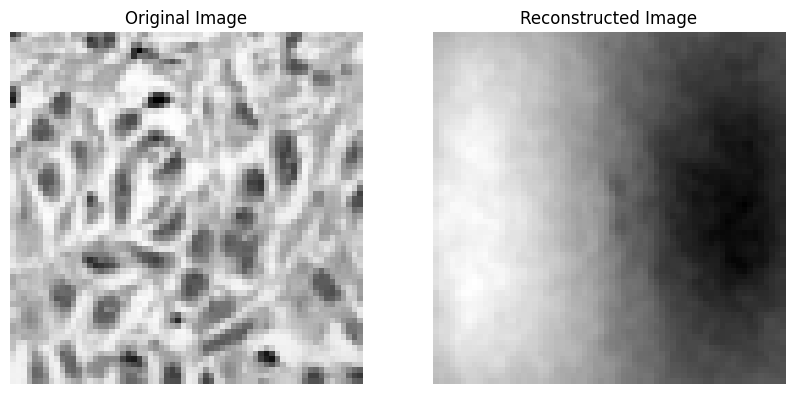

In [10]:
# Transform a single image
index = 10
image_flat = images_scaled_gray[index]

pca_gray = PCA(n_components=2)
pca_gray.fit(images_scaled_gray)
image_pca = pca_gray.transform(image_flat.reshape(1, -1))

# Reconstruct the image from PCA components
image_reconstructed_gray = pca_gray.inverse_transform(image_pca)
image_reconstructed_reshaped_gray = image_reconstructed_gray.reshape(64, 64)

# Plotting original and reconstructed grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_gray[index].reshape(64, 64), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed_reshaped_gray, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

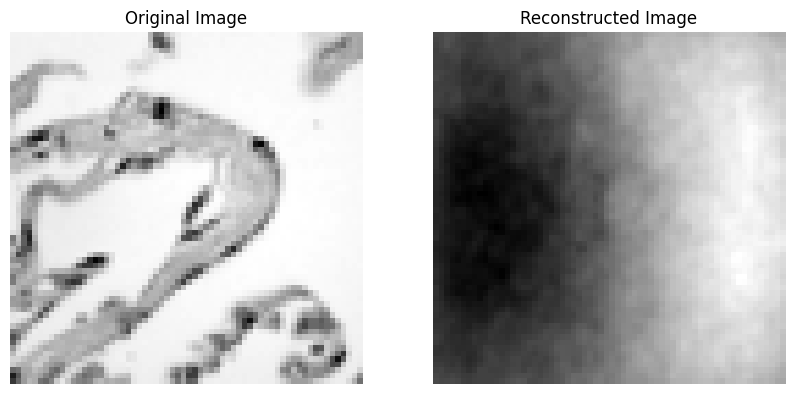

In [11]:
# Transform a single image
index = 10000
image_flat = images_scaled_gray[index]

pca_gray = PCA(n_components=2)
pca_gray.fit(images_scaled_gray)
image_pca = pca_gray.transform(image_flat.reshape(1, -1))

# Reconstruct the image from PCA components
image_reconstructed_gray = pca_gray.inverse_transform(image_pca)
image_reconstructed_reshaped_gray = image_reconstructed_gray.reshape(64, 64)

# Plotting original and reconstructed grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_gray[index].reshape(64, 64), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed_reshaped_gray, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

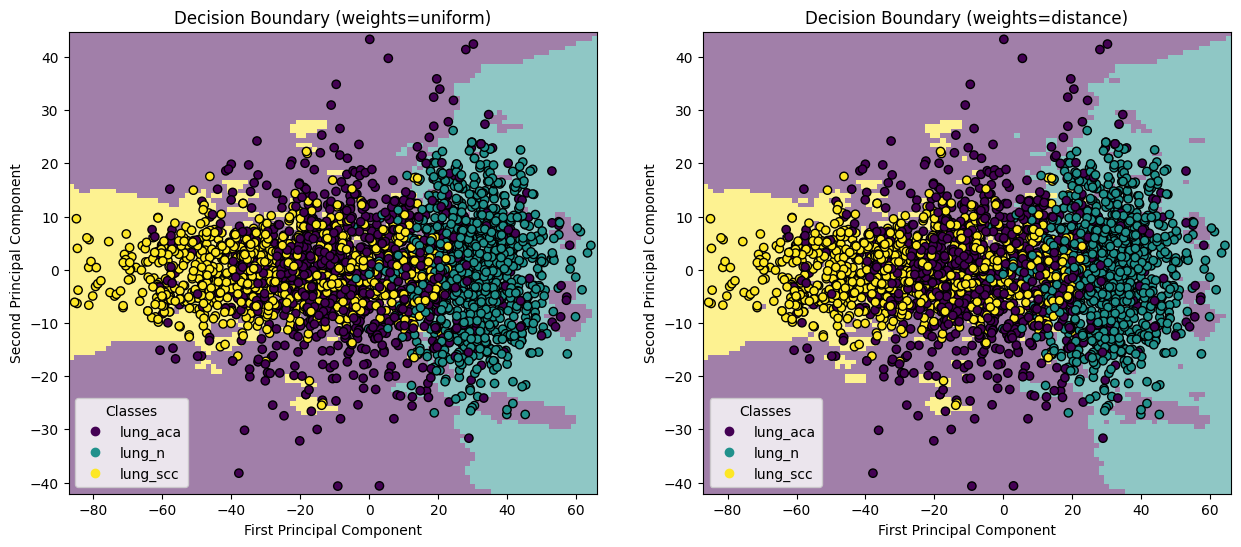

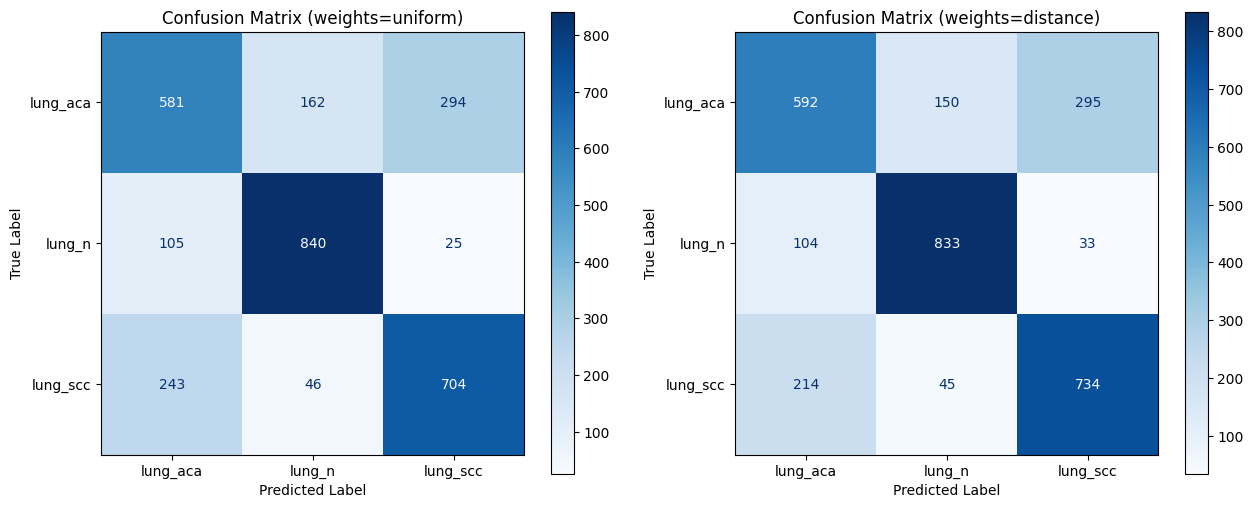

In [33]:


# Apply PCA with 2 components
n_components = 2
pca_vis = PCA(n_components=n_components)
images_pca_gray = pca_vis.fit_transform(images_scaled_gray)

# Encode the labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    images_pca_gray, labels_encoded, test_size=0.2, random_state=42
)

# Define the KNN classifier within a pipeline
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('kneighborsclassifier', KNeighborsClassifier())
])

# List of weight settings to evaluate
weight_settings = ["uniform", "distance"]

# Create subplots for decision boundaries
fig_decision, axs_decision = plt.subplots(1, 2, figsize=(15, 6))

# Create subplots for confusion matrices
fig_cm, axs_cm = plt.subplots(1, 2, figsize=(15, 6))

# Loop over different weight settings
for ax_decision, ax_cm, weights in zip(axs_decision, axs_cm, weight_settings):
    # Set the parameter for KNN weight and fit the model
    clf.set_params(kneighborsclassifier__weights=weights).fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Get the class names from the label encoder
    class_names = label_encoder.inverse_transform(np.unique(y_test))

    # Plot the decision boundary
    disp_decision = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='First Principal Component',
        ylabel='Second Principal Component',
        shading="auto",
        alpha=0.5,
        ax=ax_decision,
    )

    # Scatter plot of the PCA-transformed data
    scatter = disp_decision.ax_.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap='viridis'
    )

    # Update legend with correct class names
    handles = list(scatter.legend_elements()[0])
    labels_list = list(label_encoder.inverse_transform(np.unique(y_test)))
    disp_decision.ax_.legend(
        handles=handles,
        labels=labels_list,
        title="Classes",
        loc="lower left"
    )
    ax_decision.set_title(f"Decision Boundary (weights={weights})")

    # Plot the confusion matrix using ConfusionMatrixDisplay
    disp_cm = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=class_names)
    disp_cm.plot(cmap='Blues', ax=ax_cm, values_format='d')
    ax_cm.set_title(f'Confusion Matrix (weights={weights})')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')

plt.show()

In [34]:

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    lung_aca       0.65      0.57      0.61      1037
      lung_n       0.81      0.86      0.83       970
    lung_scc       0.69      0.74      0.71       993

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [ ]:
X = X_train  # we only take the first two features for visualization
y = y_train

n_features = 2

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(C=C, penalty="l1", solver="saga", max_iter=1000),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", max_iter=1000
    ),
    "L2 logistic (OvR)": OneVsRestClassifier(
        LogisticRegression(C=C, penalty="l2", solver="saga", max_iter=1000)
    ),
}

n_classifiers = len(classifiers)

fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=len(y_train),
    figsize=(3 * 2, n_classifiers * 2),
)
for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X, y).predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy (train) for {name}: {accuracy:0.1%}")
    for label in np.unique(y):
        # plot the probability estimate provided by the classifier
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict_proba",
            class_of_interest=label,
            ax=axes[classifier_idx, label],
            vmin=0,
            vmax=1,
        )
        axes[classifier_idx, label].set_title(f"Class {label}")
        # plot data predicted to belong to given class
        mask_y_pred = y_pred == label
        axes[classifier_idx, label].scatter(
            X[mask_y_pred, 0], X[mask_y_pred, 1], marker="o", c="w", edgecolor="k"
        )
        axes[classifier_idx, label].set(xticks=(), yticks=())
    axes[classifier_idx, 0].set_ylabel(name)

ax = plt.axes([0.15, 0.04, 0.7, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="viridis"), cax=ax, orientation="horizontal"
)

plt.show()

Accuracy (train) for L1 logistic: 66.9%
Accuracy (train) for L2 logistic (Multinomial): 66.9%
Accuracy (train) for L2 logistic (OvR): 66.5%


AttributeError: 'numpy.ndarray' object has no attribute 'ScalarMappable'

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1037c3b30>>
Traceback (most recent call last):
  File "/Users/henriquerio/miniconda3/envs/hw_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
